In [1]:
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Yearly generated labels

#### Considering positive, negative, and neutral dataset

In [2]:
path_all_stats = '/content/drive/MyDrive/dataset_patent/all_stats'
files_all_stats = [f for f in listdir(path_all_stats) if isfile(join(path_all_stats, f))]

In [4]:
print(files_all_stats)

['2020_all_stats.csv', '2019_all_stats.csv', '2018_all_stats.csv', '2017_all_stats.csv', '2016_all_stats.csv', '2015_all_stats.csv', '2014_all_stats.csv', '2013_all_stats.csv', '2012_all_stats.csv', '2011_all_stats.csv', '2010_all_stats.csv']


In [5]:
combined_all_stats_csv = pd.concat([pd.read_csv(path_all_stats+'/'+f) for f in files_all_stats ])

In [6]:
combined_all_stats_csv.to_csv( "/content/drive/MyDrive/dataset_patent/generated_files/combined_all_stats_csv.csv", index=False, encoding='utf-8-sig')

In [7]:
combined_all_stats_csv.head()

,Unnamed: 0,filename,total_publications,total_positive_samples,total_negative_samples,total_neutral_samples
0,0,ipg200107,7889,194,317,244
1,1,ipg200114,5970,127,214,157
2,2,ipg200121,6149,144,241,175
3,3,ipg200128,6140,155,250,182
4,4,ipg200204,7870,205,307,233


In [8]:
total_pnn_samples_per_year = pd.DataFrame(index=[str(i) for i in range(2010,2021,1)], columns=['total_publications','total_positive_samples','total_negative_samples','total_neutral_samples'])
total_pnn_samples_per_year.index.name = 'year'

In [15]:
# Finding total patents yearly and combining them 

def find_total_patent_yearly(df):
  for i in range(10,21,1):
    pub_gby = df.groupby(df['filename'].str.extract(r'(\w{3}'+str(i)+'\d{4})', expand=False))['total_publications'].sum().reset_index()
    pos_gby = df.groupby(df['filename'].str.extract(r'(\w{3}'+str(i)+'\d{4})', expand=False))['total_positive_samples'].sum().reset_index()
    neg_gby = df.groupby(df['filename'].str.extract(r'(\w{3}'+str(i)+'\d{4})', expand=False))['total_negative_samples'].sum().reset_index()
    neut_gby = df.groupby(df['filename'].str.extract(r'(\w{3}'+str(i)+'\d{4})', expand=False))['total_neutral_samples'].sum().reset_index()

    year = '20'+str(i)

    total_pnn_samples_per_year.loc[year,'total_publications'] = pub_gby['total_publications'].sum()
    total_pnn_samples_per_year.loc[year,'total_positive_samples'] = pos_gby['total_positive_samples'].sum()
    total_pnn_samples_per_year.loc[year,'total_negative_samples'] = neg_gby['total_negative_samples'].sum()
    total_pnn_samples_per_year.loc[year,'total_neutral_samples'] = neut_gby['total_neutral_samples'].sum()



In [16]:
find_total_patent_yearly(combined_all_stats_csv)

In [17]:
total_pnn_samples_per_year.head()

,total_publications,total_positive_samples,total_negative_samples,total_neutral_samples
year,,,,
2010,244599,11,475,19
2011,248101,90,971,110
2012,277285,535,2145,663
2013,303642,2132,4379,2433
2014,327014,4517,7211,5100


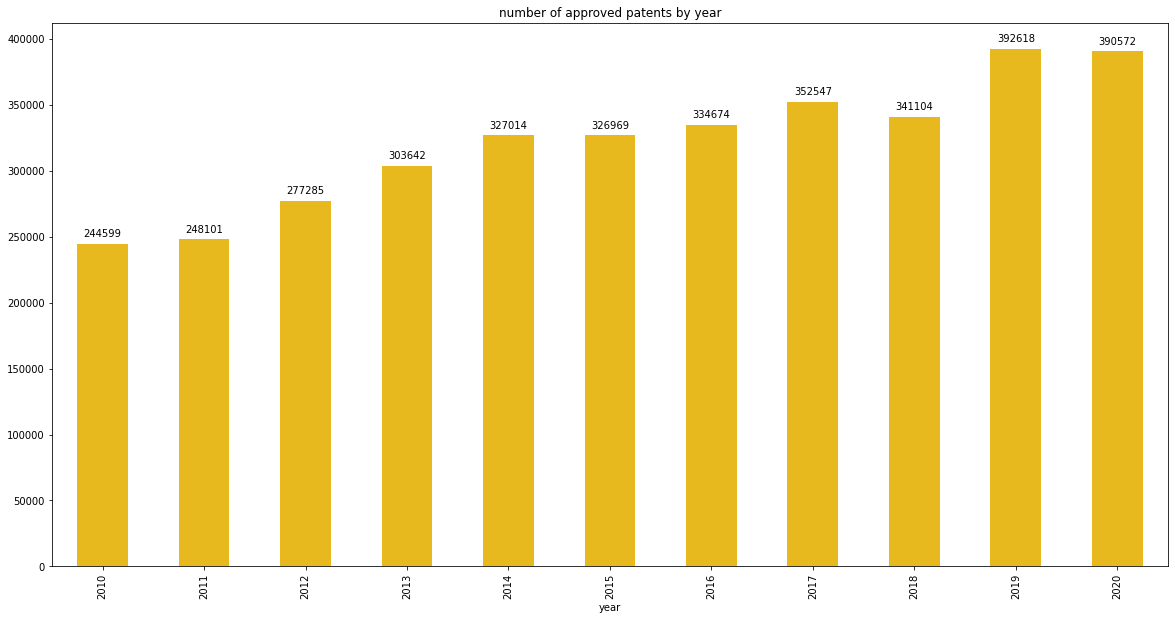

In [18]:
# Checking total numbers of approved patents year wise 

ax = total_pnn_samples_per_year.iloc[0:,0].plot(kind='bar', figsize=(20,10), title = 'number of approved patents by year', color='#e8b91e')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

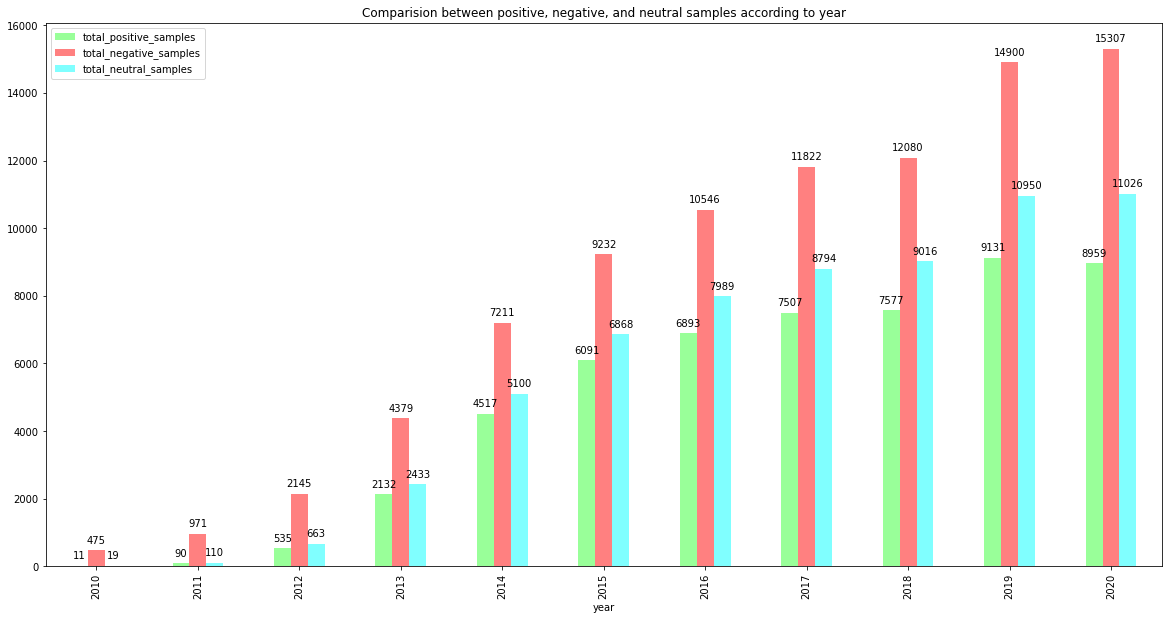

In [19]:
# Year wise generated total positive, negative, and neutral labels

ax = total_pnn_samples_per_year.iloc[0:,1:].plot(kind='bar', figsize=(20,10), title = 'Comparision between positive, negative, and neutral samples according to year', color=['#99ff99','#ff8080','#80ffff'])
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [20]:
# Common functions used for further analysis 

# A function that will calculate total number of paragraphs in a respective patent using RegEx
def countPara(text):
  return len(re.findall(r"\W\w\s\w{2}\W{2}\w\W\d{4}\W\s\w{3}\W{2}\d{4}\W{2}",text))


# Remove html tags from text description using RegEx
def rmTag(text):
  return re.sub(r"<.+?>","",text)  

## Positive dataset 

#### Merging all positive dataset and analysing them

In [21]:
path_pos_data = '/content/drive/MyDrive/dataset_patent/pos_data'
files_pos_data = [f for f in listdir(path_pos_data) if isfile(join(path_pos_data, f))]

In [22]:
print(files_pos_data)

['2019_pos_apps.csv', '2020_pos_apps.csv', '2018_pos_apps.csv', '2017_pos_apps.csv', '2016_pos_apps.csv', '2015_pos_apps.csv', '2014_pos_apps.csv', '2013_pos_apps.csv', '2012_pos_apps.csv', '2011_pos_apps.csv', '2010_pos_apps.csv']


In [23]:
combined_pos_data_csv = pd.concat([pd.read_csv(path_pos_data+'/'+f) for f in files_pos_data ])

In [24]:
combined_pos_data_csv.to_csv( "/content/drive/MyDrive/dataset_patent/generated_files/combined_pos_data_csv.csv", index=False, encoding='utf-8-sig')

In [25]:
combined_pos_data_csv.head()

,Unnamed: 0,publication_number,patent_title,appl_type,positive_text
0,0,US10165738B2,Blow operation device,utility,"['<p id=""p-0011"" num=""0010"">In such a blow ope..."
1,1,US10165942B2,"Optical tomographic imaging apparatus, control...",utility,"['<p id=""p-0018"" num=""0017"">According to the o..."
2,2,US10165999B2,Radiological-image acquisition device,utility,"['<p id=""p-0012"" num=""0011"">According to an as..."
3,3,US10166016B2,Medical retractor,utility,"['<p id=""p-0040"" num=""0039"">According to the p..."
4,4,US10166040B2,Organ resection tool,utility,"['<p id=""p-0087"" num=""0088"">(Organ Resection T..."


In [26]:
# Counting total paragraphs in application 
combined_pos_data_csv['total_paragraph'] = combined_pos_data_csv['positive_text'].apply(lambda x: countPara(x))

In [27]:
# Checking total paragraph and their respective counts 
gb_tp_pos = combined_pos_data_csv.groupby(['total_paragraph']).size().reset_index(name='counts')
gb_tp_pos.head()

,total_paragraph,counts
0,0,27
1,1,39562
2,2,6655
3,3,2493
4,4,1412


In [28]:
# Checking applications having total paragraph 0
combined_pos_data_csv[combined_pos_data_csv['total_paragraph']==0]

,Unnamed: 0,publication_number,patent_title,appl_type,positive_text,total_paragraph
4407,18,US10343409B2,"Liquid jet apparatus, tank unit, and printer",utility,[],0
6247,195,US10411893B2,Token key infrastructure and method,utility,[],0
8494,35,US10501331B2,"Totally-mesoporous zirconia nanoparticles, use...",utility,[],0
2657,144,US10629997B2,Radiating integrated antenna unit and multi-ar...,utility,[],0
2697,184,US10631418B2,LED display screen with protective devices,utility,[],0
3525,76,US10663357B2,Micro electro-mechanical strain displacement s...,utility,[],0
4271,154,US10694315B2,Technique for allowing registered mobile users...,utility,[],0
4808,153,US10715021B2,Mobile capsule device and control method thereof,utility,[],0
5786,65,US10753351B2,Air inflating device and tire repair machine c...,utility,[],0
6271,24,US10773623B2,Vehicle seat member and method of manufacturin...,utility,[],0


In [29]:
# Removing html tags from the text
combined_pos_data_csv['clean_pos_text'] = combined_pos_data_csv['positive_text'].apply(lambda x: rmTag(x))

In [30]:
# Counting total words in a paragraph 
combined_pos_data_csv['total_words_pos_text'] = combined_pos_data_csv['clean_pos_text'].str.count(' ') + 1

In [31]:
combined_pos_data_csv.head()

,Unnamed: 0,publication_number,patent_title,appl_type,positive_text,total_paragraph,clean_pos_text,total_words_pos_text
0,0,US10165738B2,Blow operation device,utility,"['<p id=""p-0011"" num=""0010"">In such a blow ope...",1,"['In such a blow operation device, the battery...",99
1,1,US10165942B2,"Optical tomographic imaging apparatus, control...",utility,"['<p id=""p-0018"" num=""0017"">According to the o...",2,['According to the one embodiment of the prese...,89
2,2,US10165999B2,Radiological-image acquisition device,utility,"['<p id=""p-0012"" num=""0011"">According to an as...",1,"['According to an aspect of the invention, it ...",43
3,3,US10166016B2,Medical retractor,utility,"['<p id=""p-0040"" num=""0039"">According to the p...",12,"['According to the present invention, there is...",1160
4,4,US10166040B2,Organ resection tool,utility,"['<p id=""p-0087"" num=""0088"">(Organ Resection T...",5,['(Organ Resection Tool Including Brush Struct...,292


## Negative dataset 

#### Merging all negative dataset and analysing them

In [32]:
path_neg_data = '/content/drive/MyDrive/dataset_patent/neg_data'
files_neg_data = [f for f in listdir(path_neg_data) if isfile(join(path_neg_data, f))]

In [33]:
print(files_neg_data)

['2019_neg_apps.csv', '2020_neg_apps.csv', '2018_neg_apps.csv', '2017_neg_apps.csv', '2016_neg_apps.csv', '2015_neg_apps.csv', '2014_neg_apps.csv', '2013_neg_apps.csv', '2012_neg_apps.csv', '2011_neg_apps.csv', '2010_neg_apps.csv']


In [34]:
combined_neg_data_csv = pd.concat([pd.read_csv(path_neg_data+'/'+f) for f in files_neg_data ])

In [35]:
combined_neg_data_csv.to_csv( "/content/drive/MyDrive/dataset_patent/generated_files/combined_neg_data_csv.csv", index=False, encoding='utf-8-sig')

In [36]:
combined_neg_data_csv.head()

,Unnamed: 0,publication_number,patent_title,appl_type,negative_text
0,0,US10165738B2,Blow operation device,utility,"['<p id=""p-0006"" num=""0005"">The demand trends ..."
1,1,US10165776B2,Substituted pyrazolylpyrazole derivative and u...,utility,"['<p id=""p-0015"" num=""0013"">An object of the p..."
2,2,US10165777B2,Substituted pyrazolylpyrazole derivative and u...,utility,"['<p id=""p-0015"" num=""0013"">An object of the p..."
3,3,US10165779B2,Substituted pyrazolylpyrazole derivative and u...,utility,"['<p id=""p-0015"" num=""0017"">An object of the p..."
4,4,US10165942B2,"Optical tomographic imaging apparatus, control...",utility,"['<p id=""p-0007"" num=""0006"">In general, an OCT..."


In [37]:
# Counting total paragraphs in application 
combined_neg_data_csv['total_paragraph'] = combined_neg_data_csv['negative_text'].apply(lambda x: countPara(x))

In [38]:
# Checking total paragraph and their respective counts 
gb_tp_neg = combined_neg_data_csv.groupby(['total_paragraph']).size().reset_index(name='counts')
gb_tp_neg.head()

,total_paragraph,counts
0,0,73
1,1,23194
2,2,29693
3,3,15446
4,4,8630


In [39]:
combined_neg_data_csv[combined_neg_data_csv['total_paragraph']==0]

,Unnamed: 0,publication_number,patent_title,appl_type,negative_text,total_paragraph
1754,52,US10208094B2,Multimeric immunoglobulin-binding domain,utility,[],0
6250,157,US10319085B2,Metadata-based image processing method and app...,utility,[],0
6490,94,US10323995B2,Rotation-shaft joint structure,utility,[],0
7030,175,US10339422B2,"Object detection device, object detection meth...",utility,[],0
8452,171,US10373021B2,"Object detection device, object detection meth...",utility,[],0
...,...,...,...,...,...,...
1689,49,US08300589B2,Method for acquiring resource region informati...,utility,[],0
80,10,US07885224B2,Method for reestablishment of IP address for i...,utility,[],0
323,10,US07953061B2,Method for transmitting control signal using e...,utility,[],0
725,19,US08040827B2,Method for transmitting sub-frame designation ...,utility,[],0


In [40]:
# Removing html tags from the text
combined_neg_data_csv['clean_neg_text'] = combined_neg_data_csv['negative_text'].apply(lambda x: rmTag(x))

In [41]:
# Counting total words in a paragraph 
combined_neg_data_csv['total_words_neg_text'] = combined_neg_data_csv['clean_neg_text'].str.count(' ') + 1

In [42]:
combined_neg_data_csv.head()

,Unnamed: 0,publication_number,patent_title,appl_type,negative_text,total_paragraph,clean_neg_text,total_words_neg_text
0,0,US10165738B2,Blow operation device,utility,"['<p id=""p-0006"" num=""0005"">The demand trends ...",3,['The demand trends for blow operation devices...,268
1,1,US10165776B2,Substituted pyrazolylpyrazole derivative and u...,utility,"['<p id=""p-0015"" num=""0013"">An object of the p...",1,['An object of the present invention is to pro...,58
2,2,US10165777B2,Substituted pyrazolylpyrazole derivative and u...,utility,"['<p id=""p-0015"" num=""0013"">An object of the p...",1,['An object of the present invention is to pro...,58
3,3,US10165779B2,Substituted pyrazolylpyrazole derivative and u...,utility,"['<p id=""p-0015"" num=""0017"">An object of the p...",1,['An object of the present invention is to pro...,58
4,4,US10165942B2,"Optical tomographic imaging apparatus, control...",utility,"['<p id=""p-0007"" num=""0006"">In general, an OCT...",2,"['In general, an OCT apparatus used for such a...",256


## Neutral dataset 

#### Merging all neutral dataset and analysing them

In [43]:
path_neut_data = '/content/drive/MyDrive/dataset_patent/neut_data'
files_neut_data = [f for f in listdir(path_neut_data) if isfile(join(path_neut_data, f))]

In [44]:
print(files_neut_data)

['2020_neut_apps.csv', '2019_neut_apps.csv', '2018_neut_apps.csv', '2017_neut_apps.csv', '2016_neut_apps.csv', '2015_neut_apps.csv', '2014_neut_apps.csv', '2013_neut_apps.csv', '2012_neut_apps.csv', '2011_neut_apps.csv', '2010_neut_apps.csv']


In [45]:
combined_neut_data_csv = pd.concat([pd.read_csv(path_neut_data+'/'+f) for f in files_neut_data ])

In [46]:
combined_neut_data_csv.to_csv( "/content/drive/MyDrive/dataset_patent/generated_files/combined_neut_data_csv.csv", index=False, encoding='utf-8-sig')

In [47]:
combined_neut_data_csv.head()

,Unnamed: 0,publication_number,patent_title,appl_type,neutral_text
0,0,US10524520B2,Suit pattern and measuring device for suit pat...,utility,"['<p id=""p-0016"" num=""0015"">The present invent..."
1,1,US10524578B2,Conveyance seat,utility,"['<p id=""p-0010"" num=""0009"">The above-describe..."
2,2,US10524605B2,Multistage steaming machine,utility,"['<p id=""p-0009"" num=""0008"">The present invent..."
3,3,US10524747B2,Holding mechanism for operation device and X-r...,utility,"['<p id=""p-0008"" num=""0007"">In response to the..."
4,4,US10524938B2,Production method for medical linear member,utility,"['<p id=""p-0008"" num=""0006"">To address the obj..."


In [48]:
# Counting total paragraphs in application 
combined_neut_data_csv['total_paragraph'] = combined_neut_data_csv['neutral_text'].apply(lambda x: countPara(x))

In [49]:
# Checking total paragraph and their respective counts 
gb_tp_neut = combined_neut_data_csv.groupby(['total_paragraph']).size().reset_index(name='counts')
gb_tp_neut.head()

,total_paragraph,counts
0,0,75
1,1,10401
2,2,8081
3,3,6286
4,4,4967


In [50]:
combined_neut_data_csv[combined_neut_data_csv['total_paragraph']==0]

,Unnamed: 0,publication_number,patent_title,appl_type,neutral_text,total_paragraph
368,124,US10536157B2,"Apparatus, system and method for analog-to-dig...",utility,[],0
838,79,US10550450B2,Method of leaching copper from copper sulfide ...,utility,[],0
1316,132,US10564927B1,Signal processing apparatus and signal process...,utility,[],0
3280,184,US10629997B2,Radiating integrated antenna unit and multi-ar...,utility,[],0
3331,235,US10631418B2,LED display screen with protective devices,utility,[],0
...,...,...,...,...,...,...
6144,55,US09194527B2,Sealing plug,utility,[],0
6275,52,US09200558B2,Muffler and engine-driven work machine,utility,[],0
2007,14,US08753962B2,Method for producing epitaxial wafer,utility,[],0
4815,14,US08911218B2,Fuel pump,utility,[],0


In [51]:
# Removing html tags from the text
combined_neut_data_csv['clean_neut_text'] = combined_neut_data_csv['neutral_text'].apply(lambda x: rmTag(x))

In [52]:
# Counting total words in a paragraph 
combined_neut_data_csv['total_words_neut_text'] = combined_neut_data_csv['clean_neut_text'].str.count(' ') + 1

In [53]:
combined_neut_data_csv.head()

,Unnamed: 0,publication_number,patent_title,appl_type,neutral_text,total_paragraph,clean_neut_text,total_words_neut_text
0,0,US10524520B2,Suit pattern and measuring device for suit pat...,utility,"['<p id=""p-0016"" num=""0015"">The present invent...",20,['The present invention provides a suit patter...,712
1,1,US10524578B2,Conveyance seat,utility,"['<p id=""p-0010"" num=""0009"">The above-describe...",16,['The above-described problem is solved by the...,1515
2,2,US10524605B2,Multistage steaming machine,utility,"['<p id=""p-0009"" num=""0008"">The present invent...",4,['The present inventors have diligently studie...,512
3,3,US10524747B2,Holding mechanism for operation device and X-r...,utility,"['<p id=""p-0008"" num=""0007"">In response to the...",1,"['In response to the above issue, one or more ...",80
4,4,US10524938B2,Production method for medical linear member,utility,"['<p id=""p-0008"" num=""0006"">To address the obj...",12,"['To address the object described above, a pro...",855


## Different plots to visualize dataset 

#### For positive dataset

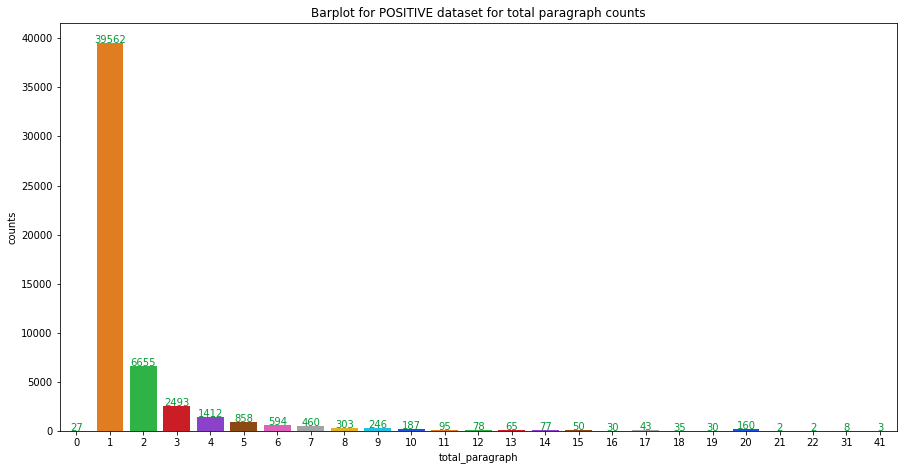

In [54]:
# Barchart for POSITIVE dataset
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.barplot(x='total_paragraph', y='counts', palette="bright",data=gb_tp_pos, ax=ax)
g.set_xticks(range(len(gb_tp_pos)))
for index, row in gb_tp_pos.iterrows():
    g.text(row.name,row.counts, round(row.counts), color='#009933', ha="center")

plt.title('Barplot for POSITIVE dataset for total paragraph counts')
plt.show()

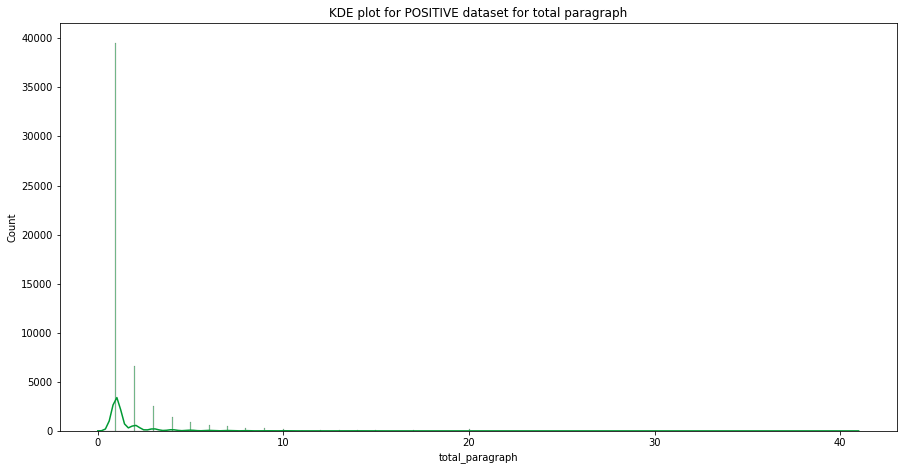

In [55]:
# Making histogram for the POSITIVE dataset distribution
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(combined_pos_data_csv.total_paragraph,kde=True, color='#009933',ax=ax)
plt.title('KDE plot for POSITIVE dataset for total paragraph')
plt.show()

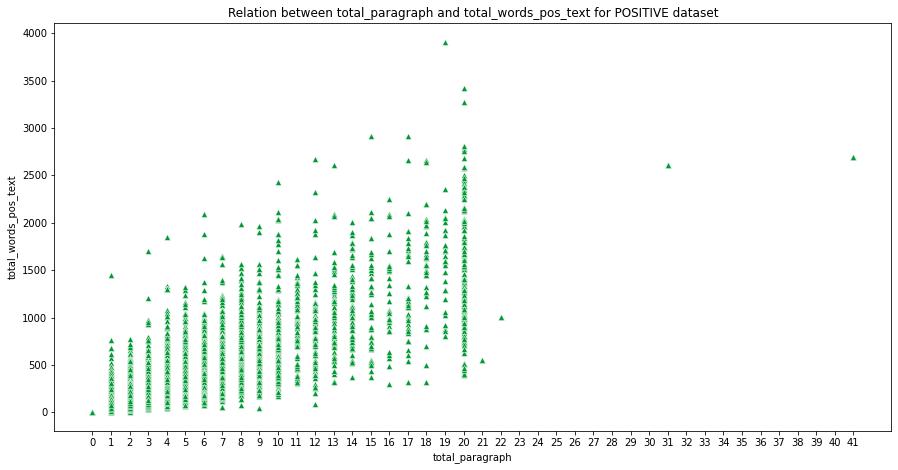

In [56]:
# Checking realtionship between total poragraph and total words in it

fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.scatterplot(x=combined_pos_data_csv.total_paragraph,y=combined_pos_data_csv.total_words_pos_text, marker= '^',color='#009933')
g.set_xticks(range(0,(combined_pos_data_csv['total_paragraph'].max())+1))
plt.title('Relation between total_paragraph and total_words_pos_text for POSITIVE dataset')
plt.show()

#### For negative dataset

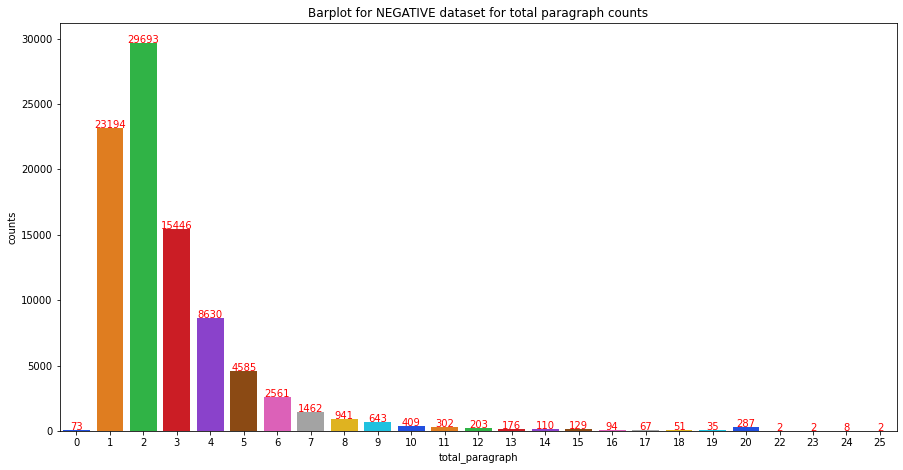

In [57]:
# Barchart for NEGATIVE dataset
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.barplot(x='total_paragraph', y='counts', palette="bright",data=gb_tp_neg, ax=ax)
g.set_xticks(range(len(gb_tp_neg)))

for index, row in gb_tp_neg.iterrows():
    g.text(row.name,row.counts, round(row.counts,2), color='#ff0000', ha="center")

plt.title('Barplot for NEGATIVE dataset for total paragraph counts')
plt.show()

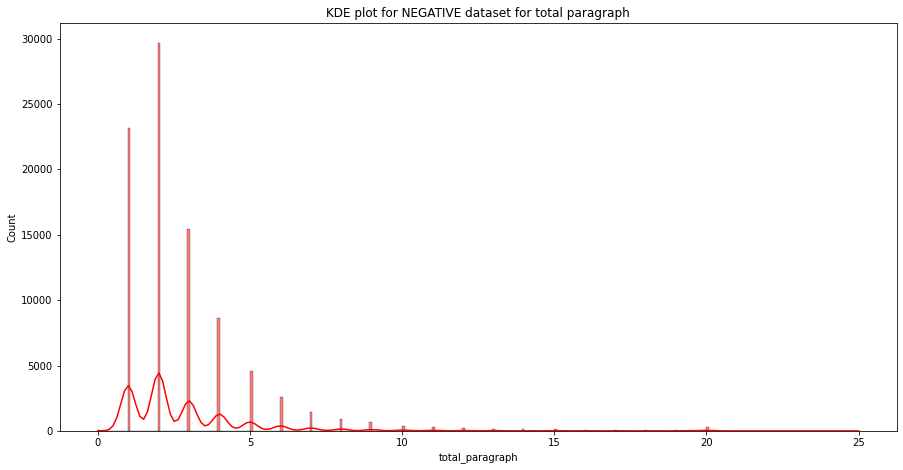

In [58]:
# Making histogram for the NEGATIVE dataset distribution
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(combined_neg_data_csv.total_paragraph, kde=True, ax=ax, color='#ff0000')
plt.title('KDE plot for NEGATIVE dataset for total paragraph')
plt.show()

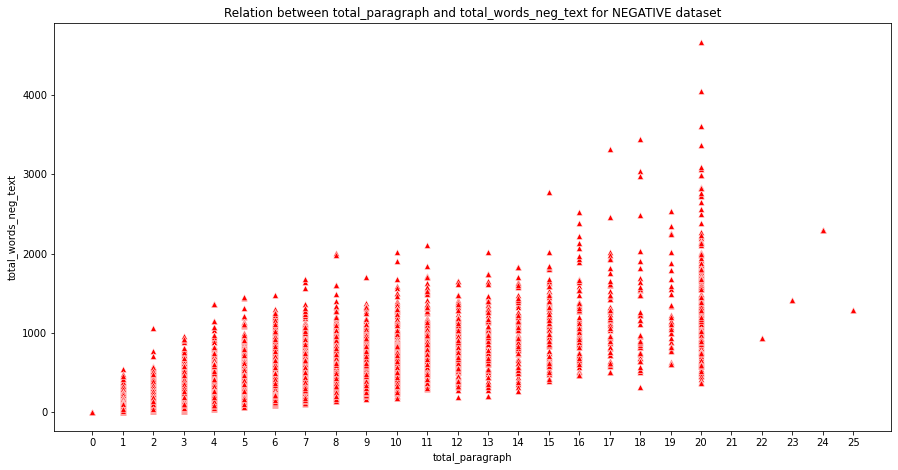

In [59]:
# Checking realtionship between total poragraph and total words in it

fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.scatterplot(x=combined_neg_data_csv.total_paragraph,y=combined_neg_data_csv.total_words_neg_text, marker= '^',color='#ff0000')
g.set_xticks(range(0,(combined_neg_data_csv['total_paragraph'].max())+1))
plt.title('Relation between total_paragraph and total_words_neg_text for NEGATIVE dataset')
plt.show()

#### For neutral dataset

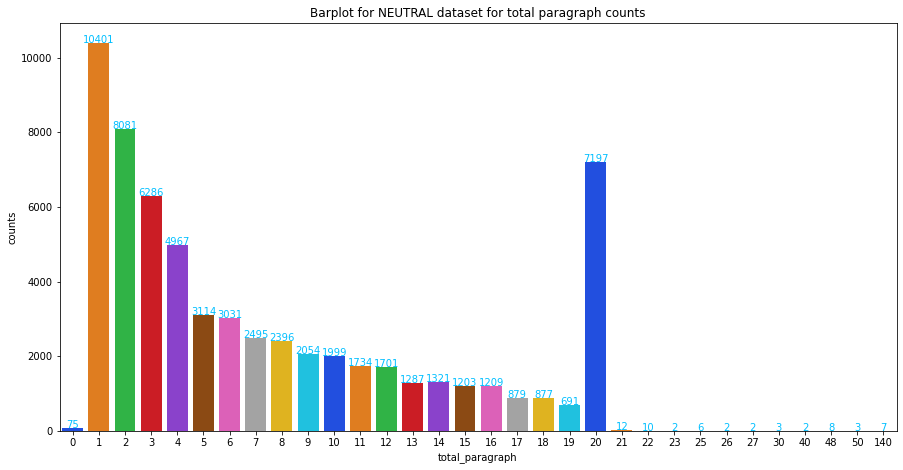

In [60]:
# Barchart for NEUTRAL dataset
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.barplot(x='total_paragraph', y='counts', palette="bright",data=gb_tp_neut, ax=ax)
g.set_xticks(range(len(gb_tp_neut)))

for index, row in gb_tp_neut.iterrows():
    g.text(row.name,row.counts, round(row.counts,2), color='#00bfff', ha="center")

plt.title('Barplot for NEUTRAL dataset for total paragraph counts')
plt.show()

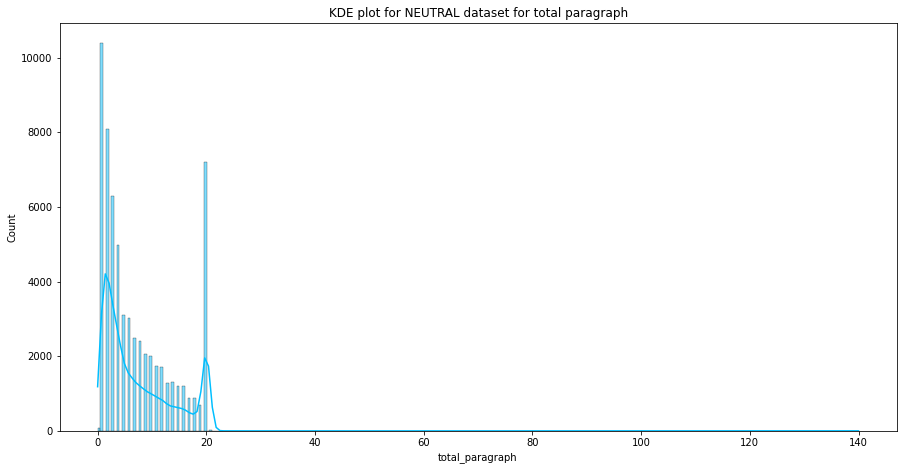

In [61]:
# Making histogram for the NEUTRAL dataset distribution
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(combined_neut_data_csv.total_paragraph, kde=True, ax=ax, color='#00bfff')
plt.title('KDE plot for NEUTRAL dataset for total paragraph')
plt.show()

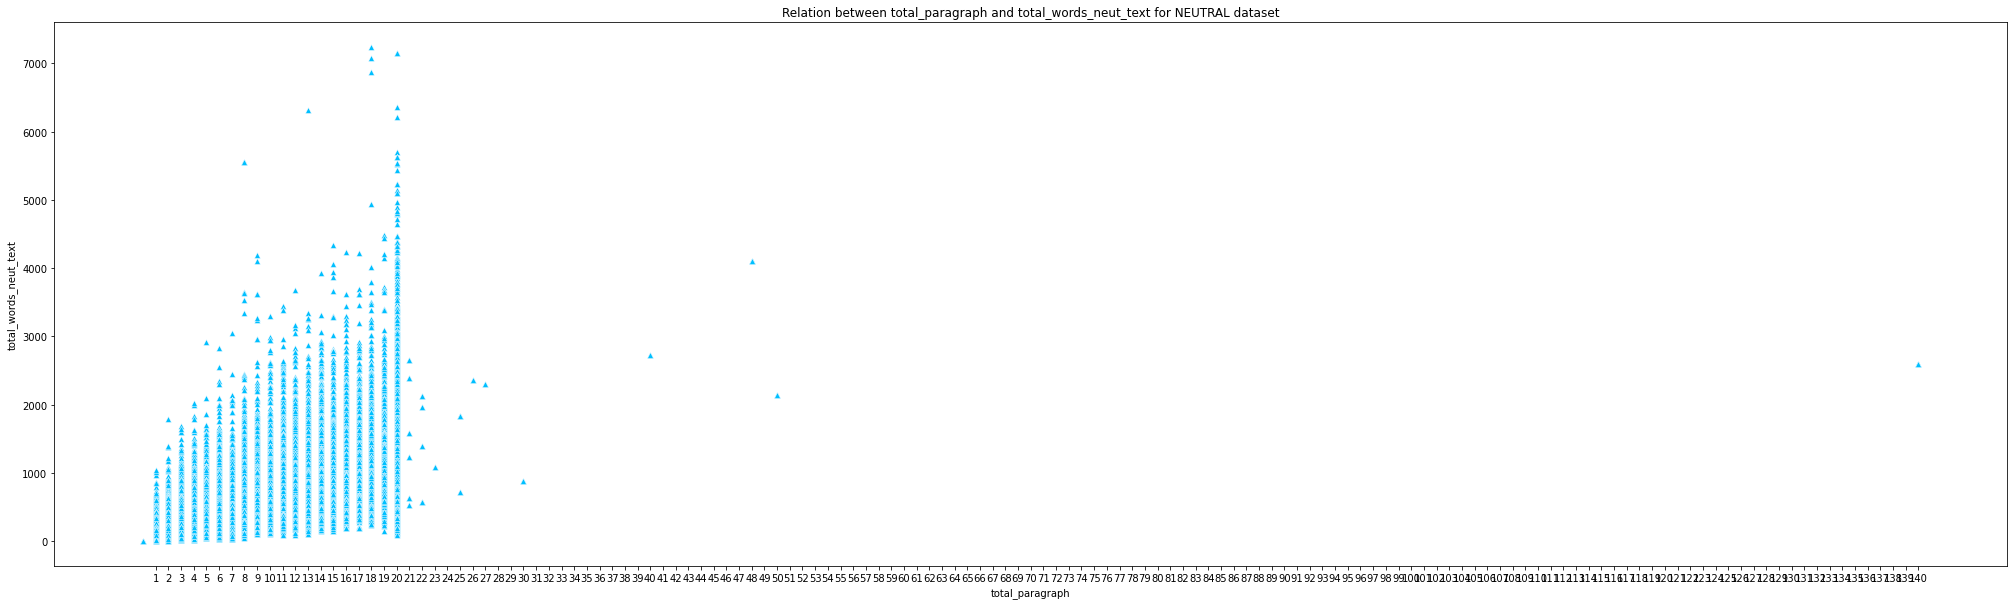

In [68]:
# Checking realtionship between total poragraph and total words in it

fig, ax = plt.subplots(figsize=(35, 10))
g = sns.scatterplot(x=combined_neut_data_csv.total_paragraph,y=combined_neut_data_csv.total_words_neut_text, marker= '^',color='#00bfff')
g.set_xticks(range(1,(combined_neut_data_csv['total_paragraph'].max())+1))
plt.title('Relation between total_paragraph and total_words_neut_text for NEUTRAL dataset')
plt.show()